Cost: 4.0


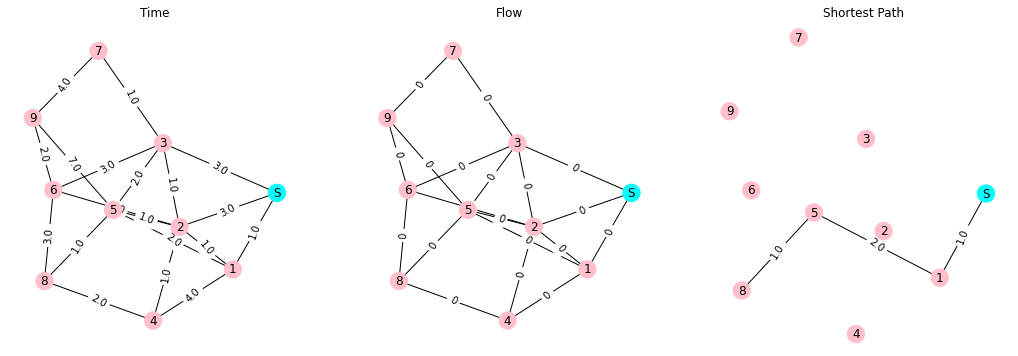

Cost: 5.0


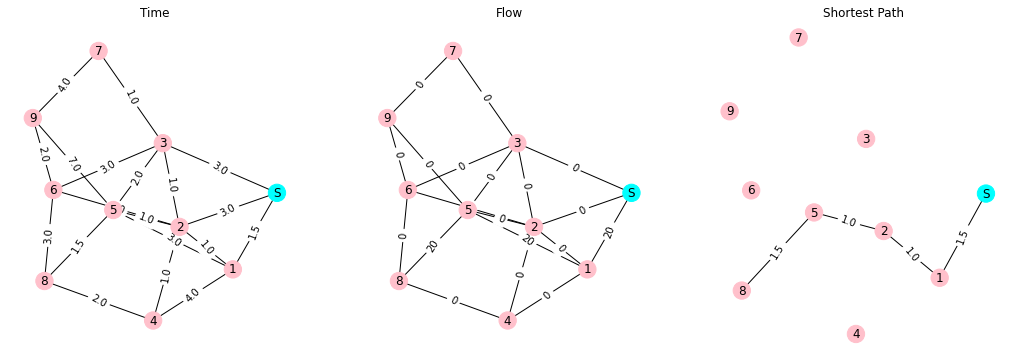

Cost: 6.0


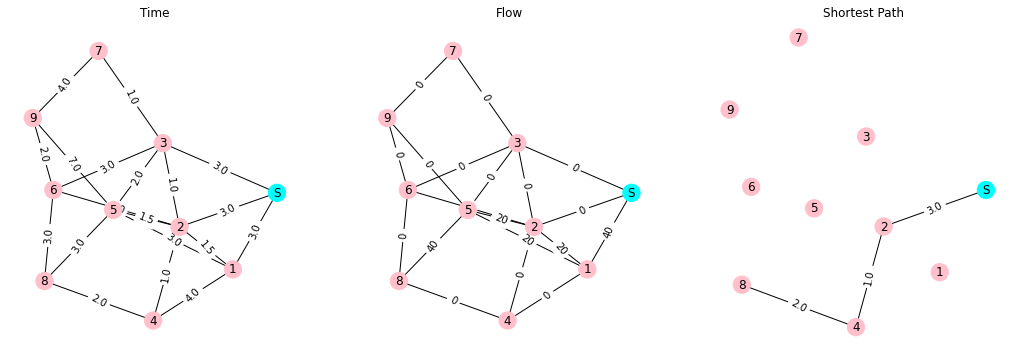

Cost: 8.5


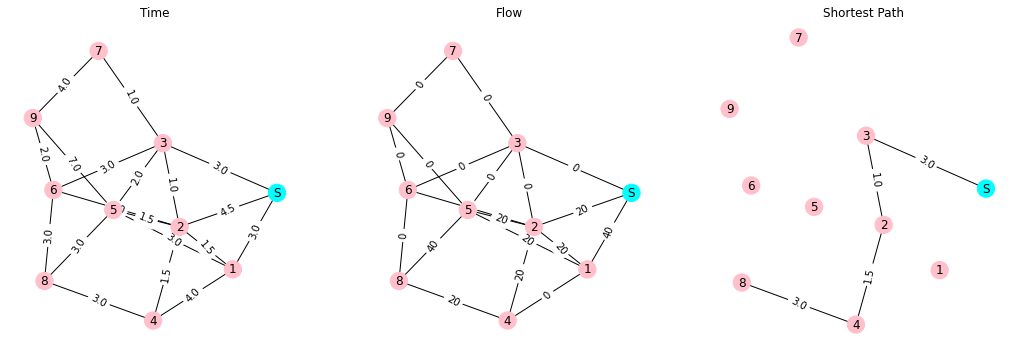

Cost: 9.5


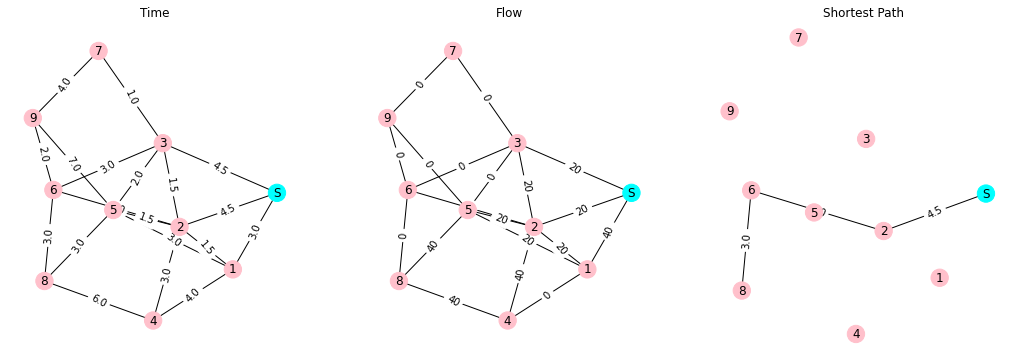

Total Cost: 1610.0
Run Time: 3.9874720573425293 seconds


In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import time

# Params
filename = 'q1_network.csv'
start_node = 'S'
end_node = '8'
link_capacity = 40
incremental_step = 20
total_count = 100

# Read excel data and extract edges
def read_edge_data(filename):
    edge_list = []
    with open(filename) as csvfile:
        data = csv.reader(csvfile)
        next(data, None)  # Skip header
        for row in data:
            edge_list.append(
                (row[0], row[1], {"Weight": float(row[2]), "Usage": 0, "Updated Weight": float(row[2])}))
    return edge_list

# Calculate new travel times based on flow in links
def calc_travel_time(t0, v):
    return t0 * (1 + 2 * ((v / 40) ** 2))

# Dijkstra algorithm
def dijkstra(graph, start_node, end_node,
             link_capacity=float('inf'), add_link_usage=0):
    graph = graph.copy()
    visited_nodes = []
    labels = {}  # List of [Distance, Node]
    history = []
    checked_links = []

    # Initialize labels list
    for node in graph.nodes:
        labels[node] = [float('inf'), None]
    labels[start_node] = [0, None]

    # Based on distance from start node, find the next processing node
    def find_next_min_distance_node(labels, visited_nodes):
        min_label = [float('inf'), '']
        min_node = None
        for node in labels:
            if labels[node][0] < min_label[0] and node not in visited_nodes:
                min_label = labels[node]
                min_node = node
        return min_node

    # Loop through graph nodes until reaching the end node
    while len(visited_nodes) < len(graph.nodes):
        processing_node = find_next_min_distance_node(labels, visited_nodes)
        visited_nodes.append(processing_node)
        for neighbor in graph[processing_node].items():
            neighbor_node = neighbor[0]
            neighbor_distance = neighbor[1]["Updated Weight"]
            if neighbor_node not in visited_nodes:
                new_dist = labels[processing_node][0] + neighbor_distance
                if labels[neighbor_node][0] > new_dist:
                    link_usage = graph[processing_node][neighbor_node]["Usage"]
                    if link_usage + add_link_usage <= link_capacity:
                        labels[neighbor_node] = [new_dist, processing_node]
        if processing_node == end_node:
            break

    # Go back through the path and make a list of nodes for shortest path
    shortest_path = []
    next_node = end_node
    while next_node is not None:
        shortest_path.insert(0, next_node)
        prev_node = next_node
        next_node = labels[next_node][1]
        if next_node is not None:
            graph[prev_node][next_node]["Usage"] += add_link_usage
            graph[prev_node][next_node]["Updated Weight"] = calc_travel_time(
                graph[prev_node][next_node]["Weight"],
                graph[prev_node][next_node]["Usage"]
            )

    return graph, shortest_path

edge_list = read_edge_data(filename)

G = nx.Graph(edge_list)
pos = nx.spring_layout(G)

total_cost = 0
start_time = time.time()

for n in range(0, total_count, incremental_step):
    newG, shortest_path = dijkstra(G, start_node, end_node,
                                   link_capacity=link_capacity,
                                   add_link_usage=incremental_step)

    # Make the result graph with the shortest path and calculate the total cost
    cost = 0
    H = nx.Graph()
    H.add_nodes_from(G.nodes)
    for i in range(0, len(shortest_path) - 1):
        node_i = shortest_path[i]
        node_j = shortest_path[i + 1]
        weight = G[node_i][node_j]["Updated Weight"]
        H.add_edge(node_i, node_j)
        H[node_i][node_j]["Weight"] = weight
        cost += weight

    print("Cost:", cost)

    colors = ['aqua'] + ['pink'] * (len(G) - 1)
    plt.figure(figsize=(18, 6))

    # Plot graph showing updated link travel times
    plt.subplot(1, 3, 1)
    plt.title("Time")
    edge_labels = nx.get_edge_attributes(G, "Updated Weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    nx.draw(G, pos, with_labels=True, node_color=colors)

    # Plot graph showing link flows
    plt.subplot(1, 3, 2)
    plt.title("Flow")
    edge_labels = nx.get_edge_attributes(G, "Usage")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    nx.draw(G, pos, with_labels=True, node_color=colors)

    # Plot graph showing the shortest path
    plt.subplot(1, 3, 3)
    plt.title("Shortest Path")
    shortest_path_edge_labels = nx.get_edge_attributes(H, "Weight")
    nx.draw_networkx_edge_labels(H, pos, shortest_path_edge_labels)
    nx.draw(H, pos, with_labels=True, node_color=colors)

    plt.show()
    G = newG
    total_cost += n * cost

print("Total Cost:", total_cost)
print("Run Time:", time.time() - start_time, "seconds")


Part 2

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Params
filename = 'Network.csv'
start_node = '723'
end_node = '6856'
link_capacity = 4000
incremental_step = 1000
total_count = 8000


# Read excel data and extrace edges
def read_edge_data(filename):
    edge_list = []
    with open(filename) as csvfile:
        data = csv.reader(csvfile)
        next(data, None) # Skip header
        for row in data:
            edge_list.append((row[0], row[1], {"Weight": float(row[2]), "Usage": 0, "Updated Weight": float(row[2])}))
    return edge_list


# Calculate new travel times based on flow in links
def calc_travel_time(t0, v):
    return t0 * (1 + 0.3 * ((v / 4000) ** 2))

In [ ]:
# Dijkstra algorithm
def dijkstra(graph, start_node, end_node, link_capacity=float('inf'), add_link_usage=0):
    visited_nodes = []
    checked_nodes = [start_node]
    labels = {} # List of [Weight, Node]

    # Initialize labels list
    for node in graph.nodes:
        labels[node] = [float('inf'), None]
    labels[start_node] = [0, None]

    # Based on distance from start node, find the next processing node
    def find_next_min_distance_node(labels, visited_nodes):
        min_label = [float('inf'), '']
        min_node = None
        for node in checked_nodes:
            if labels[node][0] < min_label[0] and node not in visited_nodes:
                min_label = labels[node]
                min_node = node
        return min_node

    # Loop through graph nodes until reaching the end node
    while len(visited_nodes) < len(graph.nodes):
        processing_node = find_next_min_distance_node(labels, visited_nodes)
        visited_nodes.append(processing_node)
        checked_nodes.remove(processing_node)
        for neighbor in graph[processing_node].items():
            neighbor_node = neighbor[0]
            neighbor_distance = neighbor[1]["Updated Weight"]
            if neighbor_node not in visited_nodes:
                checked_nodes.append(neighbor_node)
                new_dist = labels[processing_node][0] + neighbor_distance
                if labels[neighbor_node][0] > new_dist:
                    link_usage = graph[processing_node][neighbor_node]["Usage"]
                    if link_usage + add_link_usage <= link_capacity:
                        labels[neighbor_node] = [new_dist, processing_node]

        if processing_node == end_node:
            break

    # Go back through the path and make a list of nodes for shortest path
    shortest_path = []
    next_node = end_node
    while next_node is not None:
        shortest_path.insert(0, next_node)
        prev_node = next_node
        next_node = labels[next_node][1]
        if next_node is not None:
            graph[next_node][prev_node]["Usage"] += add_link_usage
            graph[next_node][prev_node]["Updated Weight"] = calc_travel_time(
                graph[next_node][prev_node]["Weight"],
                graph[next_node][prev_node]["Usage"]
            )

    return shortest_path

In [ ]:
edge_list = read_edge_data(filename)
G = nx.DiGraph(edge_list)
total_cost = 0

for n in range(0, total_count, incremental_step):
    newG, shortest_path = dijkstra(G, start_node, end_node,
                                   link_capacity=link_capacity,
                                   add_link_usage=incremental_step)

    # Calculate the total cost
    cost = 0
    for i in range(0, len(shortest_path) - 1):
        node_i = shortest_path[i]
        node_j = shortest_path[i + 1]
        weight = G[node_i][node_j]["Updated Weight"]
        cost += weight

    print("Shortest Path:", shortest_path)
    print("Number of Nodes:", len(shortest_path))
    print("Cost:", round(cost, 2))
    total_cost += n * cost
    G = newG

print("Total Cost:", round(total_cost, 2))